In [59]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [60]:
def crop_img(img, scale=1.0):
    center_x, center_y = img.shape[1] / 2, img.shape[0] / 2
    width_scaled, height_scaled = img.shape[1] * scale, img.shape[0] * scale
    left_x, right_x = center_x - width_scaled / 2, center_x + width_scaled / 2
    top_y, bottom_y = center_y - height_scaled / 2, center_y + height_scaled / 2
    img_cropped = img[int(top_y):int(bottom_y), int(left_x):int(right_x)]

In [61]:
image1 = cv2.imread('camera.jpg')
image2 = cv2.imread('kvadra.jpg')

In [ ]:
image1 = crop_img()

In [62]:
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

orb = cv2.ORB_create()

keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Сопоставляем дескрипторы
matches = bf.match(descriptors1, descriptors2)

# Сортируем совпадения по расстоянию
matches = sorted(matches, key=lambda x: x.distance)

src_pts = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5)

In [63]:
image1 = cv2.warpPerspective(image1, H, (image2.shape[1], image2.shape[0]))
# image2 = cv2.warpPerspective(image2, H, (image2.shape[1], image2.shape[0]))

(np.float64(-0.5), np.float64(3839.5), np.float64(2159.5), np.float64(-0.5))

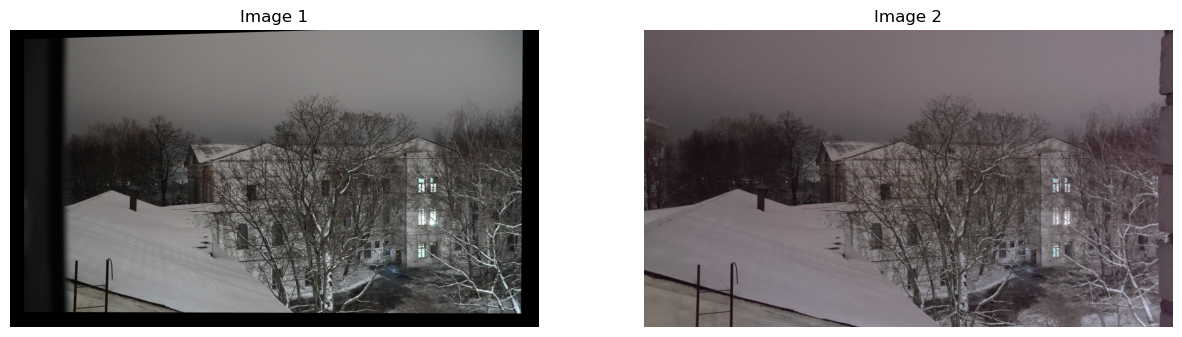

In [64]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title('Image 2')
plt.axis('off')

In [65]:
cv2.imwrite(image1, 'res_image1.jpg')
cv2.imwrite(image2, 'res_image2.jpg')

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'imwrite'
> Overload resolution failed:
>  - Expected 'filename' to be a str or path-like object
>  - Expected 'filename' to be a str or path-like object
